In [528]:
import numpy as np
import math 
import bitarray
from math import *
from matplotlib import pyplot as plt

In [529]:
## shift : the amount on which the basis function is shifted by
## number : the number of the basis function start at 0
##number = t
T = 1 ##The lenght of the basis function
value = 1/math.sqrt(T) ## The height of the function considering it is a rect

f_s = 22050
T_s = 1/f_s
sigma = 0.05


#x the basis number
def basis(x,t):
    if x >T and x<=(1+T) : 
        return value
    
def r(t) :
    return sinc(t)

def basis_rect(t) :
    return 

In [530]:
B = 0.5
T = 2

def root_raised_cos(t):
    return 4*B / (pi*sqrt(T)) * (cos((1+B)*pi*t/T) + (1-B)*pi/(4*B)*np.sinc((1-B)*t/T))/ (1 - (4*B*t/T)**2)

In [531]:
print(root_raised_cos(-0.12498866213151927))

0.7962022183108991


In [532]:
##basis discrete
## vector of the basis function
def basis():
    func = np.vectorize(root_raised_cos)
    linspace = np.linspace(-2*T, 2*T, num = f_s)
    return func(linspace)

In [533]:
def root_raised_shifted():
    cos_discrete = np.cos(np.linspace(-2*T, 2*T, num = f_s))
    return np.convolve(basis(), cos_discrete)

In [534]:
def text_to_bit(text):
    ba = bitarray.bitarray()
    ba.frombytes(text.encode('utf-8'))
    ba = np.fromiter(map(lambda x : 1 if x else 0, ba.tolist()), dtype = int)
    return ba

In [535]:
#right now convert (0,1) array to (-1 , 1) array
def b_to_c(array):
    c_s = (array -1/2)*2
    return c_s

In [536]:
##### Design a transmitter that reads a text file and returns real-valued samples of an
#information-bearing signal s[n].
#arg text_file : an array of sended values
const_size = 2
def transmitter(text_file):
    size = text_file.shape[0]
    result = np.zeros(size*f_s)
    for i in range(size):
        result[f_s*i:f_s*(i+1)] = text_file[i]*basis()
    return result

In [537]:
string_text = "ab"
constellation = b_to_c(text_to_bit(string_text))
a = transmitter(constellation)

In [538]:
print(a.shape)

(352800,)


In [539]:
#training_sequence_start = np.random.uniform(low = -0.5, high = 0.5, size = 10000)
#training_sequence_end = np.random.uniform(low = -0.5, high = 0.5, size = 10000)
#training_sequence_start = np.ones(10000)
#training_sequence_end = -np.ones(10000)
training_sequence_start = np.cos(2*pi* 100* np.arange(1000)/f_s)
training_sequence_end = np.cos(2*pi*200*np.arange(1000)/f_s)

In [540]:
def fourier_transform(x, start, end):
    nb_coef = end - start
    result = np.zeros(nb_coef)
    n = np.arange(x.shape[0])
    for f in np.arange(start, end):
        result[f - start] = np.abs(np.sum(x * np.exp(-2*1j*pi* f * (n/f_s))))
    
    return result

In [547]:
fourier_a = fourier_transform(a, -100, 100)

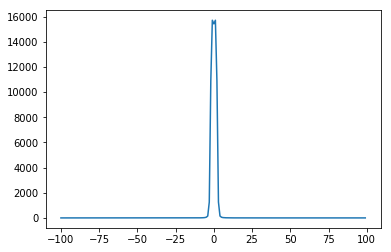

In [548]:
plt.plot(np.arange(-100, 100), fourier_a)

In [550]:
a_training_sequence = np.concatenate((training_sequence_start, a, training_sequence_end), axis = 0)

In [551]:
N = a_training_sequence.shape[0]
n = np.arange(N)
f0 = 2000
a_training_sequence_shifted = (a_training_sequence * np.exp(1j * 2 * pi * f0 * n/f_s)).real

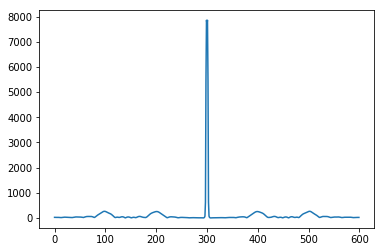

In [549]:
plt.plot(fourier_transform(a_training_sequence_shifted, 1700, 2300))

In [253]:
fourier_training_seq = fourier_transform(training_sequence_start, -300, 300)

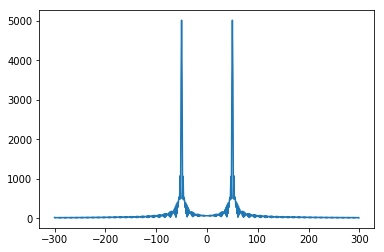

In [254]:
plt.plot(np.arange(-300, 300), fourier_training_seq)

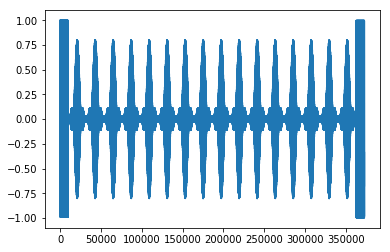

In [315]:
plt.plot(a_training_sequence_shifted)

In [486]:
transformed_start = a_training_sequence_shifted[:1000]
transformed_end = a_training_sequence_shifted[-1000:]

In [553]:
norm_start = np.linalg.norm(transformed_start)
norm_end = np.linalg.norm(transformed_end)

In [554]:
convolution_start = np.convolve(a_training_sequence_shifted, np.flip(transformed_start), mode = 'same')
convolution_end = np.convolve(a_training_sequence_shifted, np.flip(transformed_end), mode = 'same')

In [557]:
convolution = np.sqrt(np.convolve(a_training_sequence_shifted**2, 
                                  np.ones(len(training_sequence_start)), mode = 'same'))

In [565]:
print(np.max(convolution_end - norm_end*convolution))
print(np.max(convolution_start - norm_start*convolution))
print(np.argmax(convolution_end - norm_end*convolution))
print(np.argmax(convolution_start - norm_start*convolution))

-2.842170943040401e-14
0.0
354300
500


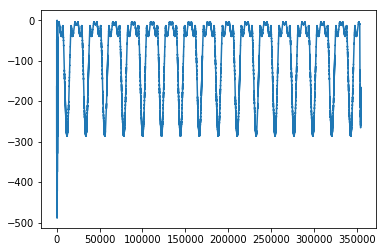

In [566]:
plt.plot(convolution_start - norm_start*convolution)

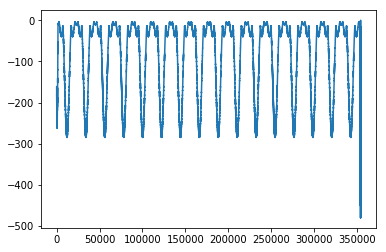

In [567]:
plt.plot(convolution_end - norm_end*convolution)

In [568]:
ba = bitarray.bitarray()
ba.frombytes("ba".encode('utf-8'))
ba = list(map(lambda x : 1 if x else 0, ba.tolist()))

In [569]:
np.savetxt('input.txt', a_training_sequence_shifted)

In [570]:
!python3 client.py --input_file='input.txt' --output_file='output.txt' --srv_hostname=iscsrv72.epfl.ch --srv_port=80

In [571]:
array_2 = np.loadtxt('output.txt')

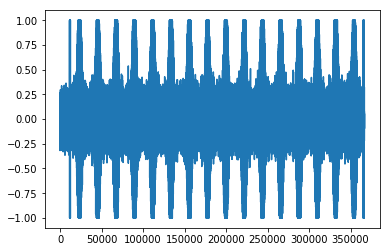

In [572]:
plt.plot(array_2)

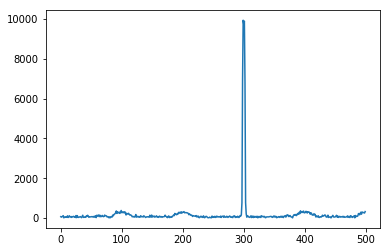

In [573]:
plt.plot(fourier_transform(array_2, 1700, 2200))

In [574]:
convolution_start = np.convolve(array_2, np.flip(transformed_start), mode= 'same')
convolution_end = np.convolve(array_2, np.flip(transformed_end), mode = 'same')

In [575]:
norm_start = np.linalg.norm(transformed_start)
norm_end = np.linalg.norm(transformed_end)

In [576]:
convolved_norm_output = np.sqrt(np.convolve(array_2**2, np.ones(10000), mode = 'same'))

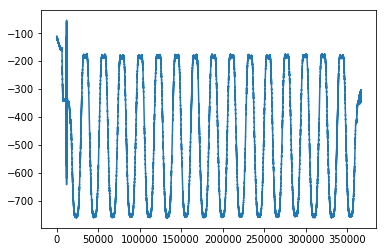

In [577]:
plt.plot(convolution_start - norm_start*convolved_norm_output)

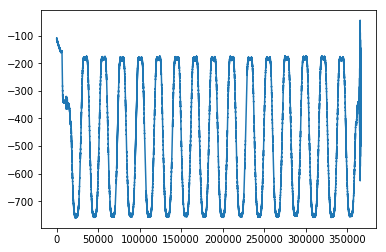

In [578]:
plt.plot(convolution_end - norm_end*convolved_norm_output)

In [579]:
start = np.argmax(convolution_start - norm_start*convolved_norm_output) + int(len(training_sequence_start)//2)
end = np.argmax(convolution_end - norm_end*convolved_norm_output) - int(len(training_sequence_end) //2)
print(start, end)

12429 365229


In [580]:
print(array_2[start:end].shape)

(352800,)


In [581]:
array_2_processed = array_2[start-1000:end+1000]

In [582]:
print(array_2_processed.shape)

(354800,)


In [592]:
N_2 = array_2_processed.shape[0]
array_2_processed_reshifted = (array_2_processed * np.cos( 2 * pi * f0 * np.arange(N_2)/f_s))

In [593]:
print(array_2_processed_reshifted)

[ 0.73809576  0.53237795  0.16272981 ...  0.44646207 -0.04577242
  0.24912777]


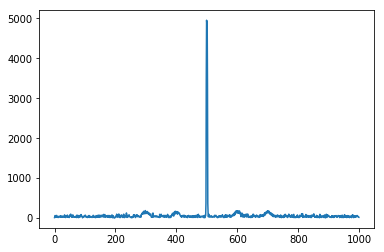

In [596]:
plt.plot(fourier_transform(array_2_processed_reshifted, 3500, 4500))

In [522]:
array_2_pre_decode = array_2_processed_reshifted[1000:-1000]

In [601]:
def low_pass(x, f_0):
    T = 2*f_0
    t = np.arange(200)/f_s
    sinc = T * np.sinc(T * t)
    return np.convolve(x, sinc, mode = 'same')

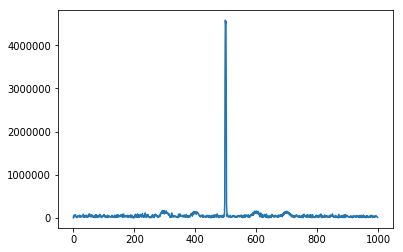

In [604]:
plt.plot(fourier_transform(low_pass(array_2_processed_reshifted, 500), 3500, 4500))

In [525]:
def decode(array_2) : 
    size = 22050
    result = np.zeros(len(constellation))
    for i in range(len(constellation))  :
        result[i] = np.sum(basis()*array_2[size*i: size*(i+1)])
    return result 

In [526]:
decode(array_2_pre_decode)

array([ 2.25413524, -0.46338576, -1.44756514,  1.90512497,  1.82256992,
        1.42636006, -0.26816497,  1.30938643, -0.20074303, -0.77597357,
        2.19067589, -0.21496295, -0.13809157, -2.04984619, -0.13534075,
       -0.94946875])

In [527]:
print(constellation)

[-1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]


Do we have to do a discretization of a continuous signal to send this array ? When you apply the noise, do you reconstruct it or apply it on the discrete signal.

Do we us have to reconstruct a countinuous signal 
